In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('country.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
data.shape

(6, 4)

In [4]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [5]:
x.describe()

,Latitude,Longitude
count,6.000000,6.000000
mean,38.971667,-9.531667
std,32.155820,86.523904
min,-25.450000,-103.770000
25%,45.415000,-73.232500
50%,48.950000,-0.065000
75%,53.295000,8.400000
max,62.400000,133.110000


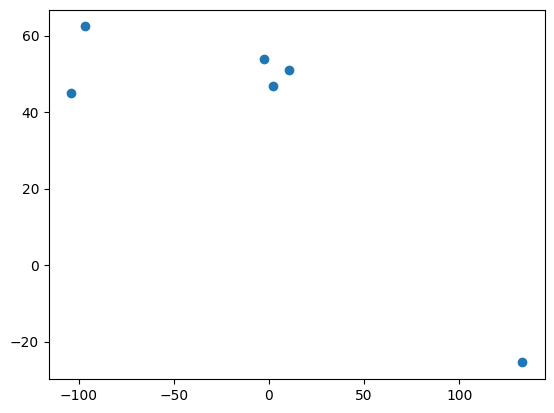

In [6]:
plt.scatter(x['Longitude'],x['Latitude'])

In [15]:
kmeans = KMeans(3,)
# kmeans = KMeans(3,random_state=3)
kmeans.fit(x)
kmeans.cluster_centers_

array([[  53.685     , -100.285     ],
       [  50.63666667,    3.42333333],
       [ -25.45      ,  133.11      ]])

In [8]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


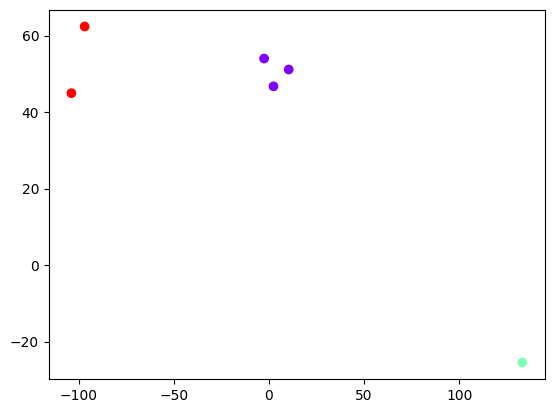

In [10]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

## Elbow Method to Determine Optimal Number of Clusters using SSE

__n_clusters:__ This parameter specifies the number of clusters to form. In the example code, it is set to k, which is a variable that iterates from 1 to 6 to evaluate the optimal number of clusters.

__max_iter:__ This parameter specifies the maximum number of iterations for each run of the K-means algorithm. The algorithm will stop iterating if the convergence criterion is met before the maximum number of iterations is reached. In the example code, it is set to 300.

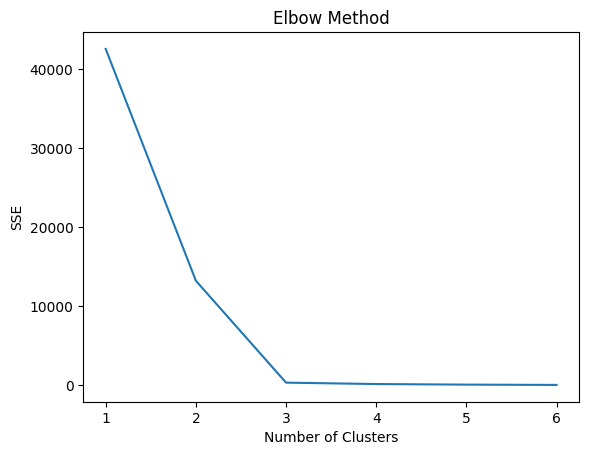

In [11]:
sse = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

number_clusters = range(1, 7)
plt.plot(number_clusters, sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [12]:
new_data = x

In [13]:
# Assuming the optimum number of clusters is 3 and you have new data 'new_data'
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)
kmeans.fit(x)
labels = kmeans.predict(new_data)

In [14]:
labels

array([2, 2, 0, 0, 0, 1], dtype=int32)